In [ ]:
loader 구현

# Toy Example2 (self loop)

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

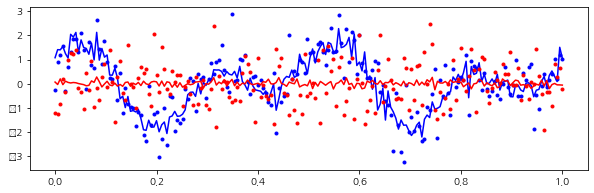

In [48]:
t = np.linspace(0,1,196)
noise1 = np.random.normal(0, 0.3, len(t))
noise2 = np.random.normal(0, 0.7, len(t))
noise3 = np.random.normal(0, 0.1, len(t))
noise4 = np.random.normal(0, 0.9, len(t))
x1 = np.sin(8*np.pi*t) + np.cos(4*np.pi*t) + noise1
x2 = x1 + noise2
x3 = 0*np.cos(4*np.pi*t) + noise3
x4 = x3 + noise4
plt.figure(figsize=(10,3))
plt.plot(t,x1, color='blue')
plt.plot(t,x2, '.', color='blue') 
plt.plot(t,x3, color='red')
plt.plot(t,x4, '.', color='red')
plt.show()

In [49]:
X = pd.DataFrame(np.ones((196,4)))
X.iloc[:,0]=x1
X.iloc[:,1]=x2
X.iloc[:,2]=x3
X.iloc[:,3]=x4

In [50]:
X = X.rename(columns={0:'node1', 1:'node2', 2:'node3', 3:'node4'})

In [51]:
cor1 = X.corr()

In [61]:
cor1

,node1,node2,node3,node4
node1,1.0000,0.8236,-0.0321,-0.0508
node2,0.8236,1.0000,0.0144,-0.0492
node3,-0.0321,0.0144,1.0000,0.1230
node4,-0.0508,-0.0492,0.1230,1.0000


In [63]:
# cor1 = cor1.fillna(0)
cor1 = round(cor1,4)
cor1 = (abs(cor1) > 0.5 )* 1
cor1

,node1,node2,node3,node4
node1,1,1,0,0
node2,1,1,0,0
node3,0,0,1,0
node4,0,0,0,1


In [54]:
cor2 = pd.DataFrame({'node1':[1.0000,0.0000,1.0,0.0000], 'node2':[0.0,1.0,0.0,1.0], 'node3':[1.0, 0.0000, 1.0, 0.0], 'node4':[0.0,1.0,0.0,1.0]})
cor2

,node1,node2,node3,node4
0,1.0,0.0,1.0,0.0
1,0.0,1.0,0.0,1.0
2,1.0,0.0,1.0,0.0
3,0.0,1.0,0.0,1.0


<Axes: >

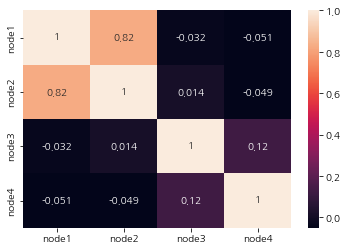

In [55]:
sns.heatmap(cor1, annot=True)

<Axes: >

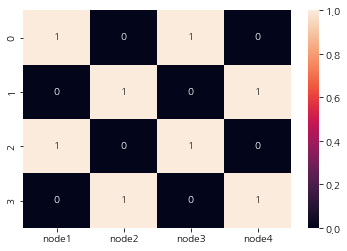

In [56]:
sns.heatmap(cor2, annot=True)

In [64]:
edges = []

for i in range(4):
    for j in range(4):
        #if i != j:
            edges.append([i,j])
print(edges)

[[0, 0], [0, 1], [0, 2], [0, 3], [1, 0], [1, 1], [1, 2], [1, 3], [2, 0], [2, 1], [2, 2], [2, 3], [3, 0], [3, 1], [3, 2], [3, 3]]


In [65]:
FX = []    
for i in range(196):
    FX.append(list(X.iloc[i,:])) 
#FX

In [66]:
weights = []

for i in range(4):
    for j in range(4):
        if i != j:
            weights.append(cor1.iloc[i,j])
        else:
            weights.append(1)

In [67]:
weights2 = []

for i in range(4):
    for j in range(4):
        if i != j:
            weights2.append(cor2.iloc[i,j])
        else:
            weights2.append(1)

In [68]:
node_list = (X.columns).tolist()
node_ids = {node : i for i, node in enumerate(node_list)}
node_ids

{'node1': 0, 'node2': 1, 'node3': 2, 'node4': 3}

In [78]:
import json
with open('./toy_example2/data/normal.json', 'r') as f:

    json_data = json.load(f)

# print(json.dumps(json_data) )

In [80]:
test1 = json_data.copy()
test2 = json_data.copy()

In [81]:
test1['weights'] = weights
test2['weights'] = weights2

In [84]:
import json

In [86]:
test1.keys()

dict_keys(['edges', 'node_ids', 'weights', 'FX'])

In [87]:
type(test1['weights'])

list

In [85]:
file_path = './toy_example2/data2/normal.json'
with open(file_path, 'w') as f:
    json.dump(test1, f)

TypeError: Object of type int64 is not JSON serializable

In [ ]:
file_path = './toy_example2/data2/normal.json'
with open(file_path, 'w') as f:
    json.dump(test2, f)

In [69]:
data_dict = {'edges':edges, 'node_ids':node_ids, 'weights':weights, 'FX': FX}

In [70]:
data_dict2 = data_dict.copy()
data_dict2['weights'] = weights2

In [76]:
import json
import urllib

In [75]:
file_path = './toy_example2/data2/normal.json'
with open(file_path, 'w') as f:
    json.dump(data_dict, f)

TypeError: Object of type int64 is not JSON serializable

In [ ]:
# with open('./toy_example2/data2/abnormal.json', 'w') as f:
#     json.dump(data_dict2, f)

## LRNR

In [2]:
import eptstgcn
import torch
import pandas as pd
import numpy as np
import gc

In [3]:
import importlib
importlib.reload(eptstgcn)

<module 'eptstgcn' from '/home/jy/Dropbox/noteda/posts/SOLAR/eptstgcn/__init__.py'>

In [29]:
url1 = 'https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/toy_example2/data/normal.json'
loader1 = eptstgcn.DatasetLoader(url1)
dataset1 = loader1.get_dataset(lags=1)
train_dataset, test_dataset = eptstgcn.utils.temporal_signal_split(dataset1, train_ratio = 0.9)

In [30]:
url2 = 'https://raw.githubusercontent.com/pinkocto/noteda/main/posts/SOLAR/toy_example2/data/abnormal.json'
loader2 = eptstgcn.DatasetLoader(url2)
dataset2 = loader2.get_dataset(lags=1)
train_dataset2, test_dataset2 = eptstgcn.utils.temporal_signal_split(dataset2, train_ratio = 0.9)

In [31]:
lrnr = eptstgcn.StgcnLearner(train_dataset, dataset_name = 'ver1')
lrnr2 = eptstgcn.StgcnLearner(train_dataset2, dataset_name = 'ver2')

In [22]:
lrnr.learn(filters=4, epoch=50)

In [23]:
lrnr2.learn(filters=4, epoch=50)

## VISUALIZATION

|구분|mse(train)|mse(test)|
|:---|:---------|:--------|
|가중치 잘 준 버전|0.22|0.38|
|가중치 이상하게|0.49|1.07|
||||
|가중치 잘 준 버전(+self-loop)|0.08|0.14|
|가중치 이상하게(+self-loop)|0.33|0.78|


### VER1.노드1,2 // 노드3,4 -- 가중치 제대로

#### TRAIN

In [24]:
evtor1 = eptstgcn.ToyEvaluator(lrnr, train_dataset, test_dataset)
evtor2 = eptstgcn.ToyEvaluator(lrnr2, train_dataset2, test_dataset2)

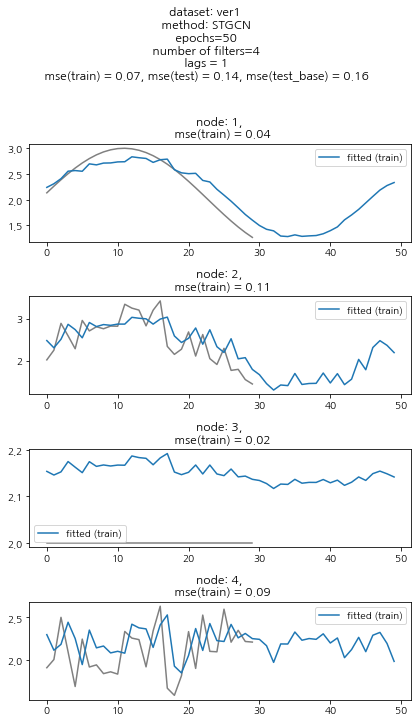

In [25]:
evtor1.tr_plot(t=50)

In [11]:
np.array(test_dataset.features).shape

(29, 4, 1)

#### TEST

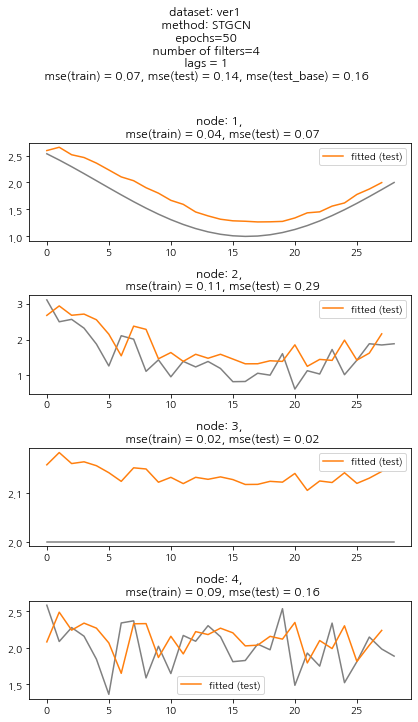

In [26]:
evtor1.test_plot(t=28)

### VER2. 노드1,3 // 노드2,4 -- 가중치 임의로 바꿔서

#### TRAIN

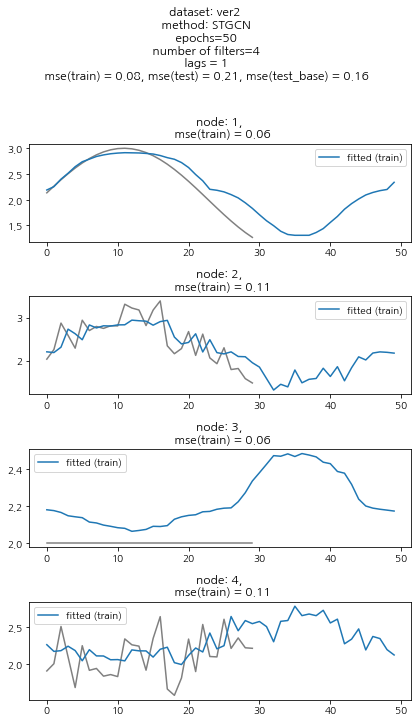

In [27]:
evtor2.tr_plot(t=50)

#### TEST

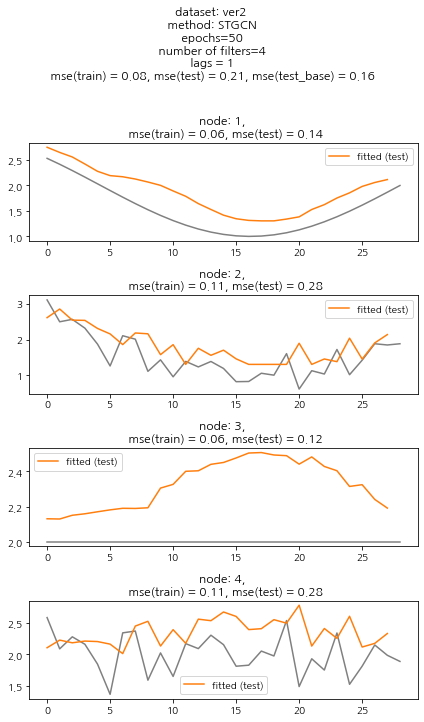

In [28]:
evtor2.test_plot(t=28)